In [1]:
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import NuSVC

np.random.seed(0)

import os
os.add_dll_directory('C:\Aorda\PSG\lib')
import psgpython as psg
from psgutilities import *

In [4]:
# Define coordinates for the vertices of the triangle
vertices = np.array([[-4, 0], [4, 0], [0, 6]])

# Class -1: Generate data points in the first cluster (triangle vertex 1)
mean_class_minus = vertices[0]
cov_class_minus = [[1, 0], [0, 1]]
class_minus = np.random.multivariate_normal(mean_class_minus, cov_class_minus, 250)

# Class 0: Generate data points in the second cluster (triangle vertex 2)
mean_class_zero = vertices[1]
cov_class_zero = [[1, 0], [0, 1]]
class_zero = np.random.multivariate_normal(mean_class_zero, cov_class_zero, 250)

# Class +1: Generate data points in the third cluster (triangle vertex 3)
mean_class_plus = vertices[2]
cov_class_plus = [[1, 0], [0, 1]]
class_plus = np.random.multivariate_normal(mean_class_plus, cov_class_plus, 250)

# Combine the three clusters and shuffle
X1 = np.vstack((class_minus, class_zero, class_plus))
# y = np.hstack((np.ones(250, dtype=int) * -1, np.zeros(250, dtype=int), np.ones(250, dtype=int)))

# Define the equation of the line for the hyperplane (e.g., y = mx + c)
# Here, let's use a line with a positive slope
m = 2  # Slope of the line
c = -1    # Intercept

# Calculate the y-coordinate of each point on the line
y1_hyperplane = m * X1[:, 0] + c

# Assign labels based on whether the point is above or below the line
y1 = np.where(X1[:, 1] > y1_hyperplane, 1, -1)

# Shuffle the dataset
shuffle_idx = np.arange(len(X1))
np.random.shuffle(shuffle_idx)
X1 = X1[shuffle_idx]
y1 = y1[shuffle_idx]


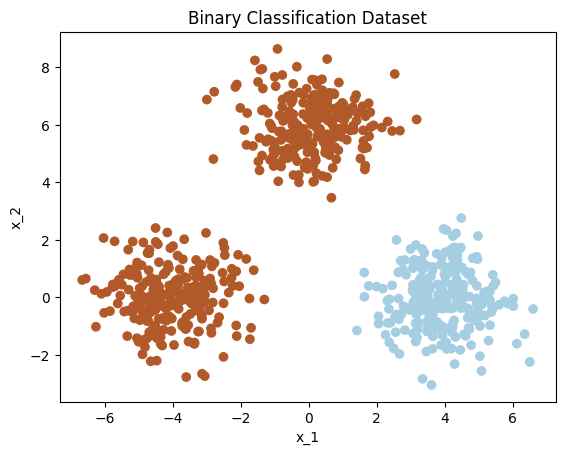

In [47]:
plt.scatter(X1[:, 0], X1[:, 1], c=y1, cmap=plt.cm.Paired)
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.title('Binary Classification Dataset')
plt.show()

In [3]:


# Define coordinates for the vertices of the triangle
vertices = np.array([[-4, 0], [4, 0], [0, 6]])

# Class -1: Generate data points in the first cluster (triangle vertex 1)
mean_class_minus = vertices[0]
cov_class_minus = [[1, 0], [0, 1]]
class_minus = np.random.multivariate_normal(mean_class_minus, cov_class_minus, 250)

# Class 0: Generate data points in the second cluster (triangle vertex 2)
mean_class_zero = vertices[1]
cov_class_zero = [[1, 0], [0, 1]]
class_zero = np.random.multivariate_normal(mean_class_zero, cov_class_zero, 250)

# Class +1: Generate data points in the third cluster (triangle vertex 3)
mean_class_plus = vertices[2]
cov_class_plus = [[1, 0], [0, 1]]
class_plus = np.random.multivariate_normal(mean_class_plus, cov_class_plus, 250)

# Combine the three clusters and shuffle
X2 = np.vstack((class_minus, class_zero, class_plus))
# y = np.hstack((np.ones(250, dtype=int) * -1, np.zeros(250, dtype=int), np.ones(250, dtype=int)))

# Define the equation of the line for the hyperplane (e.g., y = mx + c)
# Here, let's use a line with a positive slope
m = -1.4  # Slope of the line
c = 0.8   # Intercept

# Calculate the y-coordinate of each point on the line
y2_hyperplane = m * X2[:, 0] + c

# Assign labels based on whether the point is above or below the line
y2 = np.where(X2[:, 1] > y2_hyperplane, 1, -1)

# Shuffle the dataset
shuffle_idx = np.arange(len(X2))
np.random.shuffle(shuffle_idx)
X2 = X2[shuffle_idx]
y2 = y2[shuffle_idx]


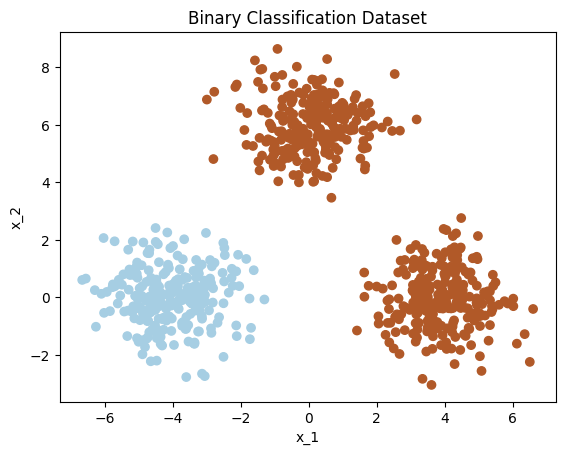

In [44]:
plt.scatter(X2[:, 0], X2[:, 1], c=y2, cmap=plt.cm.Paired)
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.title('Binary Classification Dataset')
plt.show()

In [25]:
def gen_data():
  # Define coordinates for the vertices of the triangle
  vertices = np.array([[-4, 0], [4, 0], [0, 6]])

  # Class -1: Generate data points in the first cluster (triangle vertex 1)
  mean_class_minus = vertices[0]
  cov_class_minus = [[1, 0], [0, 1]]
  class_minus = np.random.multivariate_normal(mean_class_minus, cov_class_minus, 250)

  # Class 0: Generate data points in the second cluster (triangle vertex 2)
  mean_class_zero = vertices[1]
  cov_class_zero = [[1, 0], [0, 1]]
  class_zero = np.random.multivariate_normal(mean_class_zero, cov_class_zero, 250)

  # Class +1: Generate data points in the third cluster (triangle vertex 3)
  mean_class_plus = vertices[2]
  cov_class_plus = [[1, 0], [0, 1]]
  class_plus = np.random.multivariate_normal(mean_class_plus, cov_class_plus, 250)

  # Combine the three clusters and shuffle
  X1 = np.vstack((class_minus, class_zero, class_plus))
  # Assign labels: 0 and 2 as -1, 1 as +1
  y1 = np.where(np.isin(X1, class_minus).all(axis=1) | np.isin(X1, class_plus).all(axis=1), -1, 1)

  # Shuffle the dataset
  shuffle_idx = np.arange(len(X1))
  np.random.shuffle(shuffle_idx)
  X1 = X1[shuffle_idx]
  y1 = y1[shuffle_idx]

  # Create a separate dataset with modified labels
  X2 = np.vstack((class_minus, class_zero, class_plus))
  # Assign labels: 1 and 2 as +1, 0 as -1
  y2 = np.where(np.isin(X2, class_zero).all(axis=1) | np.isin(X2, class_plus).all(axis=1), 1, -1)

  # Shuffle the dataset
  shuffle_idx = np.arange(len(X2))
  np.random.shuffle(shuffle_idx)
  X2 = X2[shuffle_idx]
  y2 = y2[shuffle_idx]

  # Return the datasets
  return [X1, X2], [y1, y2]

In [115]:
DIMS = 2
a = np.array([1] * DIMS) # initial vector
epsilon = 0.1 # error allowance
x = np.array([0] * DIMS)

In [4]:
def min_bpoe(X, y, a, initial_w=None):
  y = [y[i] * a[i] for i in range(DIMS)]
  X = np.hstack((X[i] for i in range(DIMS)))
  extra_column = np.ones((len(X), DIMS))
  X = np.hstack((X, extra_column))

  cols_to_multiply1 = X[:, [0, 1, 4]]
  cols_to_multiply2 = X[:, [2, 3, 5]]

  result1 = cols_to_multiply1 * y[0].reshape(-1, 1)
  result2 = cols_to_multiply2 * y[1].reshape(-1, 1)

  bpoe_matrix_scenarios_body = np.hstack((result1, result2))

  bpoe_scenario_benchmark = np.array([a @ x] * len(X))
  bpoe_matrix_scenarios_body = np.column_stack((bpoe_matrix_scenarios_body, bpoe_scenario_benchmark))

  bpoe_header = ['w11', 'w12', 'b1', 'w21', 'w22', 'b2']
  bpoe_matrix_scenarios = [bpoe_header+['scenario_benchmark'], bpoe_matrix_scenarios_body]
  bpoe_matrix_quadratic1_body = np.asarray([[1, 0, 0, 0, 0, 0],
                                            [0, 1, 0, 0, 0, 0]])
  bpoe_matrix_quadratic2_body = np.asarray([[0, 0, 0, 1, 0, 0],
                                            [0, 0, 0, 0, 1, 0]])
  bpoe_matrix_quadratic1 = [bpoe_header, bpoe_matrix_quadratic1_body]
  bpoe_matrix_quadratic2 = [bpoe_header, bpoe_matrix_quadratic2_body]

  allowExternal = True
  suppressMessages = False
  bpoe_problem_name = "problem_classify"
  bpoe_problem_statement = f"minimize\n\
  bpoe({0},matrix_scenarios)\n\
  Constraint: <= 1\n\
  quadratic(matrix_quadratic1)\n\
  quadratic(matrix_quadratic2)\n\
  Box: >= -10, <= 10\n\
  Solver: VAN"
  bpoe_problem_dictionary = {'problem_name':bpoe_problem_name, 
                             'problem_statement':bpoe_problem_statement, 
                             'matrix_scenarios':bpoe_matrix_scenarios, 
                             'matrix_quadratic1':bpoe_matrix_quadratic1, 
                             'matrix_quadratic2':bpoe_matrix_quadratic2}
  if(initial_w is not None):
    bpoe_problem_statement = f"minimize\n\
    bpoe({0},matrix_scenarios)\n\
    Constraint: <= 1\n\
    quadratic(matrix_quadratic1)\n\
    quadratic(matrix_quadratic2)\n\
    Box: >= -10, <= 10\n\
    Solver: VAN, init_point = point_initial_w"
    bpoe_problem_dictionary['point_initial_w'] = [bpoe_header, initial_w]

  bpoe_res = psg.psg_solver(bpoe_problem_dictionary, allowExternal, suppressMessages)
  print(f"{bpoe_problem_name} Result:\n{bpoe_res}")
  print(f"{bpoe_problem_name} Optimal Point:\n{get_optimalpoint(bpoe_res)}")
  print(f"{bpoe_problem_name} Objective:\n{get_objective(bpoe_res)}")

  return (get_optimalpoint(bpoe_res), get_objective(bpoe_res))

In [5]:
def min_pm(X, y, w, initial_a=None):
  w11, w12, b1, w21, w22, b2 = w
  X1, X2 = X
  y1, y2 = y
  X1[:, 0] *= w11
  X1[:, 1] *= w12
  X1 = np.sum(X1, axis=1) + b1
  X1 = x[0] - (y1 * X1)
  X2[:, 0] *= w21
  X2[:, 1] *= w22
  X2 = np.sum(X2, axis=1) + b2
  X2 = x[1] - (y2 * X2)
  pm_matrix_scenarios_body = np.column_stack((X1, X2))
  pm_header = ['a1', 'a2']
  pm_matrix_scenarios = [pm_header, pm_matrix_scenarios_body]
  pm_matrix_linear_body = np.asarray([1, 1])
  pm_matrix_linear = [pm_header, pm_matrix_linear_body]

  allowExternal = True
  suppressMessages = False
  pm_problem_name = "problem_classify"
  pm_problem_statement = f"minimize\n\
  pm_pen({-1},matrix_scenarios)\n\
  Constraint: == 2\n\
  linear(matrix_linear)\n\
  Box: >= 0\n\
  Solver: VAN"
  pm_problem_dictionary = {'problem_name':pm_problem_name, 
                             'problem_statement':pm_problem_statement, 
                             'matrix_scenarios':pm_matrix_scenarios,
                             'matrix_linear':pm_matrix_linear}
  
  if(initial_a is not None):
    pm_problem_statement = f"minimize\n\
    pm_pen({-1},matrix_scenarios)\n\
    Constraint: == 2\n\
    linear(matrix_linear)\n\
    Box: >= 0\n\
    Solver: VAN, init_point = point_initial_a"
    pm_problem_dictionary['point_initial_a'] = [pm_header, initial_a]

  pm_res = psg.psg_solver(pm_problem_dictionary, allowExternal, suppressMessages)
  print(f"{pm_problem_name} Result:\n{pm_res}")
  print(f"{pm_problem_name} Optimal Point:\n{get_optimalpoint(pm_res)}")
  print(f"{pm_problem_name} Objective:\n{get_objective(pm_res)}")

  return (get_optimalpoint(pm_res), get_objective(pm_res))

  

In [46]:
X, y = gen_data()


Running solver
Reading problem formulation
Asking for data information
Getting data
     14.3% of scenarios is processed
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.255356883663E+01  Residual=-.800000000000E+01
Ext.iteration=23  Objective=0.137975136631E+01  Residual=-.620427337646E+01
Start stage  1
Ext.iteration=0  Objective=0.402859109430E-13  Residual=-.620427337646E+01
Ext.iteration=37  Objective=-.167266427044E+02  Residual=-.273259957595E+03
Start stage  2
Ext.iteration=0  Objective=0.557474141873E-12  Residual=-.273259957595E+03
Ext.iteration=71  Objective=-.114819480743E+01  Residual=0.491591947593E-06
Start stage  3
Ext.iteration=0  Objective=0.541175909959E-12  Residual=0.491591947593E-06
Ext.iteration=75  Objective=-.400877565425E-01  Residual=-.171693683968E+00
Start stage  4
Ext.iteration=0  Objective=0.546010077876E-12  Residual=-.171693683968E+00
Ext.iteration=20 

C:\Users\jacob\AppData\Local\Temp\ipykernel_11108\3453442895.py:3: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.hstack((X[i] for i in range(DIMS)))


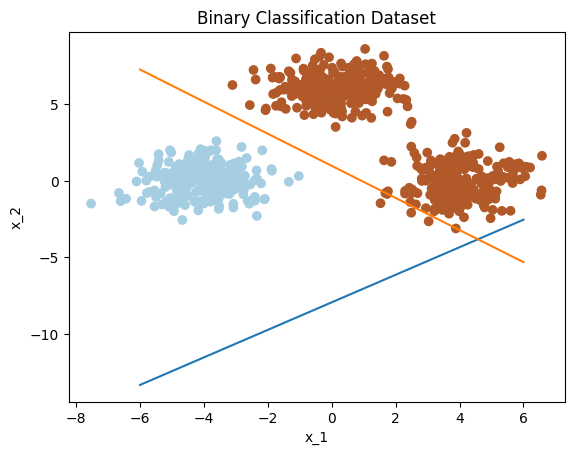

In [47]:
bpoe_opt_point, bpoe_obj = min_bpoe(np.copy(X), np.copy(y), a)
weights = bpoe_opt_point[1]
f1 = lambda x: (weights[2] - weights[0]*x)/weights[1]
f2 = lambda x: (weights[5] - weights[3]*x)/weights[4]
x_vals = np.linspace(-6, 6, 20)
y1_vals = f1(x_vals)
y2_vals = f2(x_vals)
plt.scatter(X[1][:, 0], X[1][:, 1], c=y[1], cmap=plt.cm.Paired)
plt.plot(x_vals, y1_vals)
plt.plot(x_vals, y2_vals)
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.title('Binary Classification Dataset')
plt.show()


In [12]:
pm_opt_point, pm_obj = min_pm(np.copy(X), np.copy(y), weights)

Running solver
Reading problem formulation
Asking for data information
Getting data
     50.0% of scenarios is processed
100% of matrix_scenarios was read
100% of matrix_linear was read
Start optimization
Ext.iteration=0  Objective=0.100000000000E+01  Residual=0.000000000000E+00
Ext.iteration=3  Objective=0.381131820921E+00  Residual=0.000000000000E+00
Optimization is stopped
Solution is optimal
Calculating resulting outputs. Writing solution.
Objective: objective = 0.381131820921 [0.00000000000]
Solver has normally finished. Solution was saved.
Problem: problem_1, solution_status = optimal
Timing: data_loading_time = 0.15, preprocessing_time = 0.01, solving_time = 0.01
Variables: optimal_point = point_problem_1
Objective: objective = 0.381131820921 [0.00000000000]
Constraint: constraint_1 =  2.000000000000E+00 [ 4.440892098501E-16]
Function: pm_pen(-1,matrix_scenarios) =  3.811318209215E-01
Function: linear(matrix_linear) =  2.000000000000E+00
OK. Solver Finished

problem_classify Res

In [83]:
def driver():
  X, y = gen_data()
  # step 2
  bpoe_opt_point, bpoe_obj = min_bpoe(np.copy(X), np.copy(y), a)
  w_tilda = bpoe_opt_point[1]
  # step 3
  pm_opt_point, pm_obj = min_pm(np.copy(X), np.copy(y), w_tilda)
  a_tilda = pm_opt_point[1]

  a1, a2 = a_tilda
  w11, w12, b1, w21, w22, b2 = w_tilda
  X1, X2 = np.copy(X)
  y1, y2 = np.copy(y)
  X1[:, 0] *= w11
  X1[:, 1] *= w12
  X1 = np.sum(X1, axis=1) + b1
  X1 = a1 * (x[0] - (y1 * X1))

  X2[:, 0] *= w21
  X2[:, 1] *= w22
  X2 = np.sum(X2, axis=1) + b2
  X2 = a2 * (x[1] - (y2 * X2))

  p_tilda = np.sum(np.maximum(X1+X2, 0))/len(X1) # max element wise and then expectation
  print('p tilda:')
  print(p_tilda)
  # p_tilda = pm_obj
  # print('p tilda:')
  # print(p_tilda)

  w_star = w_tilda
  a_star = a
  while(True):
    bpoe_opt_point, bpoe_obj = min_bpoe(np.copy(X), np.copy(y), a_tilda, initial_w = w_tilda)
    w_star = bpoe_opt_point[1]
    pm_opt_point, pm_obj = min_pm(np.copy(X), np.copy(y), w_star, initial_a = a_tilda)
    a_star = pm_opt_point[1]

    # ???
    w11, w12, b1, w21, w22, b2 = w_star
    X1, X2 = np.copy(X)
    y1, y2 = np.copy(y)
    X1[:, 0] *= w11
    X1[:, 1] *= w12
    X1 = np.sum(X1, axis=1) + b1
    X1 = a_star[0] * (x[0] - (y1 * X1))

    X2[:, 0] *= w21
    X2[:, 1] *= w22
    X2 = np.sum(X2, axis=1) + b2
    X2 = a_star[1] * (x[1] - (y2 * X2))

    p_star = np.sum(np.maximum(X1+X2, 0))/len(X1) # max element wise and then expectation
    print('p star:')
    print(p_star)
    # p_star = pm_obj
    # print('p star:')
    # print(p_star)

    if(p_tilda - p_star < epsilon):
      break
      
    w_tilda, a_tilda, p_tilda = w_star, a_star, p_star
  
  return p_tilda, p_star, w_tilda, w_star, a_tilda, a_star, X, y


C:\Users\jacob\AppData\Local\Temp\ipykernel_10756\3453442895.py:3: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  X = np.hstack((X[i] for i in range(DIMS)))


Running solver
Reading problem formulation
Asking for data information
Getting data
     14.3% of scenarios is processed
100% of matrix_scenarios was read
100% of matrix_quadratic1 was read
100% of matrix_quadratic2 was read
Start optimization
Ext.iteration=0  Objective=0.252539454872E+01  Residual=-.800000000000E+01
Ext.iteration=27  Objective=0.153186357981E+01  Residual=-.727204448947E+01
Start stage  1
Ext.iteration=0  Objective=0.643557310408E-13  Residual=-.727204448947E+01
Ext.iteration=53  Objective=-.321643241483E+01  Residual=0.000000000000E+00
Start stage  2
Ext.iteration=0  Objective=0.182634390932E-11  Residual=-.113686837722E-12
Ext.iteration=73  Objective=-.735848250098E+00  Residual=0.312308884531E-06
Start stage  3
Ext.iteration=0  Objective=0.841375268665E-12  Residual=0.312309111905E-06
Ext.iteration=45  Objective=-.987540118940E-01  Residual=0.980082859314E-08
Start stage  4
Ext.iteration=0  Objective=0.709279772864E-12  Residual=0.980082859314E-08
Ext.iteration=95 

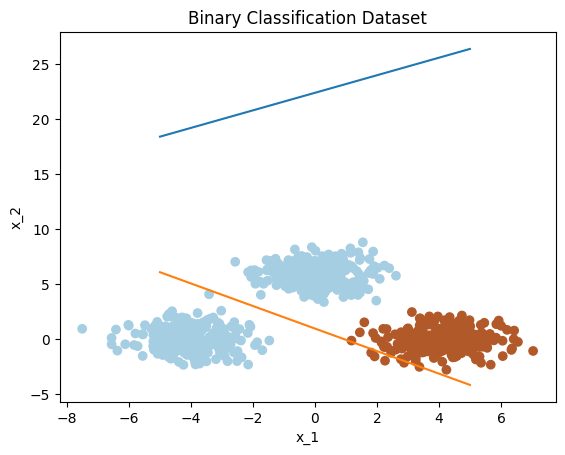

In [114]:
p_tilda, p_star, w_tilda, w_star, a_tilda, a_star, X, y = driver()
f1 = lambda x: (w_star[2] - w_star[0]*x)/w_star[1]
f2 = lambda x: (w_star[5] - w_star[3]*x)/w_star[4]
x_vals = np.linspace(-5, 5, 20)
y1_vals = f1(x_vals)
y2_vals = f2(x_vals)
plt.scatter(X[0][:, 0], X[0][:, 1], c=y[0], cmap=plt.cm.Paired)
plt.plot(x_vals, y1_vals)
plt.plot(x_vals, y2_vals)
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.title('Binary Classification Dataset')
plt.show()